In [1]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Data/SJS/sjsChances.csv").reset_index()
data.dropna(inplace=True)

In [3]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities.to_csv("Shots/SJSOrigins.csv",index=False)

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

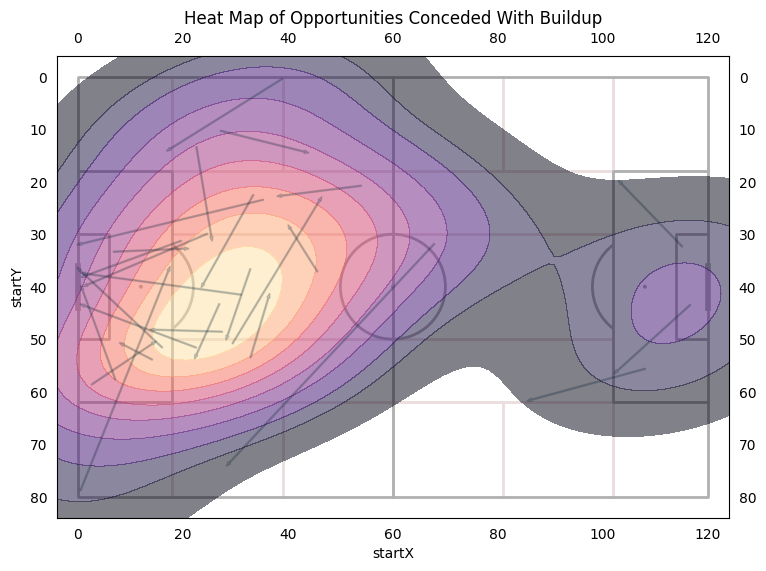

In [13]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [14]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [15]:
origins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Player,startX,startY,endX,endY,Side
0,1,SJS,0.0,Tackle,Successful,"[69.99999999999997, 48.952380952380956]","[-1, -1]",SJS,8.0,50.000000,31.047619,121.000000,81.000000,right
3,7,SJS,1.0,Set Piece,Successful,"[74.38095238095238, 42.85714285714286]","[79.52380952380952, 51.04761904761905]",SJS,-1.0,45.619048,37.142857,40.476190,28.952381,right
6,13,SJS,2.0,Pass,Successful,"[3.3333333333333215, 36.57142857142857]","[17.238095238095227, 24.0]",SJS,-1.0,116.666667,43.428571,102.761905,56.000000,right
9,19,SJS,3.0,Pass,Unsuccessful,"[90.57142857142856, 29.14285714285714]","[73.99999999999997, 56.38095238095238]",UCSD,6.0,29.428571,50.857143,46.000000,23.619048,right
12,25,SJS,4.0,Throw-in,Successful,"[81.04761904761904, 79.61904761904762]","[102.38095238095238, 66.28571428571428]",SJS,-1.0,38.952381,0.380952,17.619048,13.714286,right
15,31,SJS,5.0,Pass,Successful,"[11.904761904761891, 24.38095238095238]","[33.61904761904761, 18.47619047619048]",SJS,-1.0,108.095238,55.619048,86.380952,61.523810,right
18,37,SJS,6.0,Pass,Successful,"[115.14285714285714, 32.38095238095238]","[103.52380952380952, 20.38095238095238]",SJS,-1.0,115.142857,32.380952,103.523810,20.380952,left
21,43,SJS,7.0,Set Piece,Successful,"[0.4761904761904674, 78.85714285714286]","[17.238095238095227, 36.952380952380956]",SJS,-1.0,0.476190,78.857143,17.238095,36.952381,left
24,49,SJS,8.0,Pass,Unsuccessful,"[27.14285714285713, 10.285714285714292]","[43.14285714285713, 14.285714285714292]",UCSD,10.0,27.142857,10.285714,43.142857,14.285714,left


Text(0.5, 1.0, 'Opponent Shots Origin')

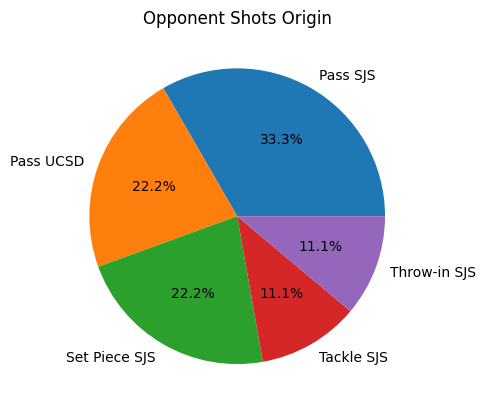

In [16]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Shots Origin")

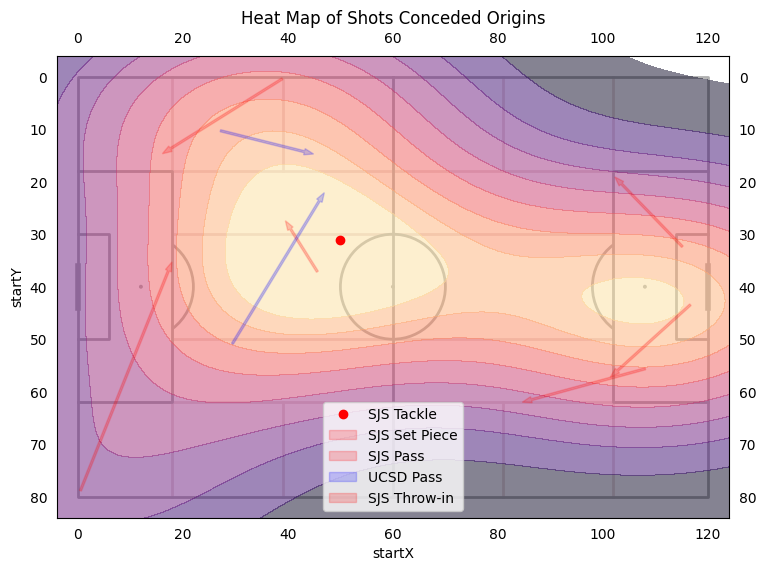

In [17]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


9

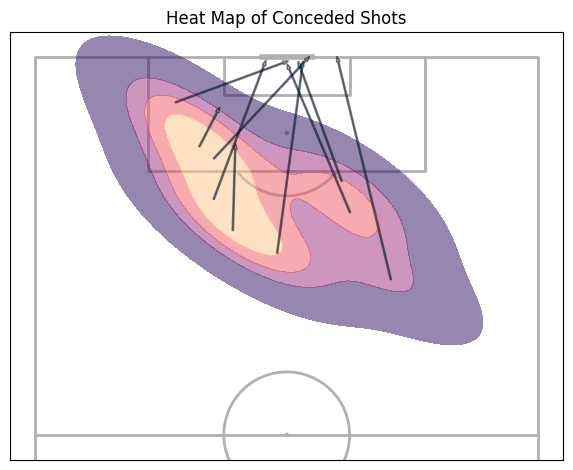

In [25]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Conceded Shots")
shots.shape[0]

In [22]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])
shotAssists

,numOpportunity,Game,Team,Event,Event Result,startX,startY,endX,endY,Shot result
0,0.0,SJS,SJS,Pass,Successful,32.857143,36.571429,28.476190,49.333333,Unsuccessful
1,1.0,SJS,SJS,Pass,Successful,26.952381,43.238095,22.571429,52.952381,Unsuccessful
2,2.0,SJS,SJS,Pass,Successful,2.571429,58.666667,14.190476,50.857143,Unsuccessful
3,3.0,SJS,SJS,Pass,Successful,33.428571,22.476190,23.904762,39.428571,Unsuccessful
4,4.0,SJS,SJS,Pass,Successful,22.571429,13.333333,25.428571,30.476190,Unsuccessful
5,5.0,SJS,SJS,Pass,Successful,67.904762,31.809524,28.857143,73.523810,Unsuccessful
6,6.0,SJS,SJS,Pass,Successful,32.857143,53.523810,36.285714,42.095238,Successful
7,7.0,SJS,SJS,Pass,Successful,54.000000,20.761905,38.761905,22.666667,Unsuccessful
8,8.0,SJS,UCSD,Tackle,Successful,6.761905,33.333333,20.285714,32.761905,Unsuccessful


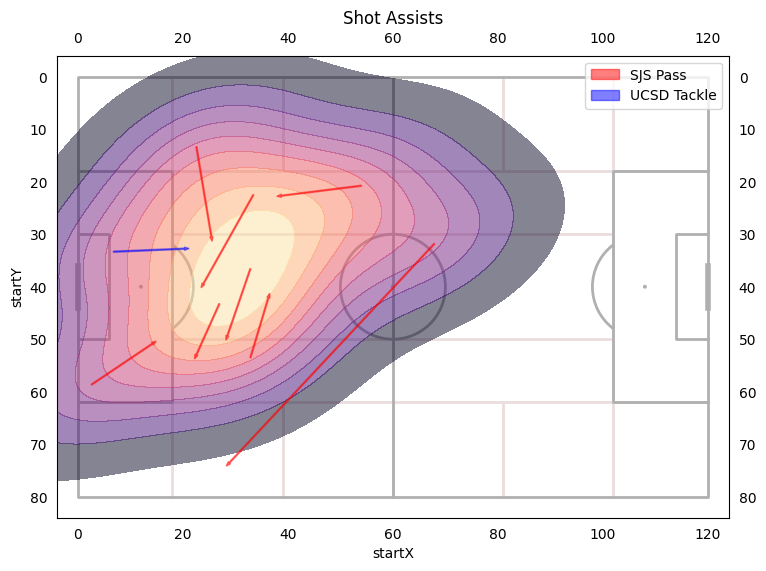

In [24]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    # if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
    #     if row.get("Event")=="Tackle":
    #          shape = 'o'
    #     else:
    #          shape = 'v'
    #     if team == "UCSD":
    #         color = "b"
    #     else:
    #         color = "r"
    #     plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
    #     continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

ValueError: 'label' must be of length 'x'

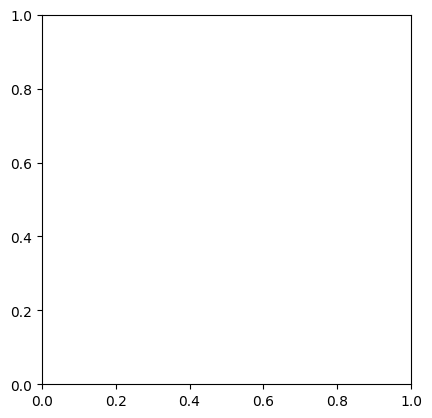

In [21]:
counts = shotAssists.groupby(["Event","Team"]).count()
plt.pie(counts.get("Game"),labels=["Lipscomb Pass","UCSD Tackle","Lipscomb Tackle"],autopct='%1.1f%%')
plt.title("Shot Assists")